# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [3]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [4]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['MEDV'])
y = data.MEDV

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [6]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [8]:
train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)
print(train_score, test_score)

0.7313050500731024 0.7702513049405079


## 4. Calculate and print mean squared error for both the training and the testing set.

In [10]:
from sklearn.metrics import mean_squared_error as mse

print(mse(y_train, y_pred_train))
print(mse(y_test, y_pred_test))

22.627574287297712
19.478225980198584


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [11]:
from sklearn.metrics import mean_absolute_error as mae

print(mae(y_train, y_pred_train))
print(mae(y_test, y_pred_test))

3.2716594384598254
3.4606986707198257


## Classification Model Evaluation

In [19]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=.01, solver='lbfgs')
logreg.fit(X_train, y_train)

y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [22]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.825
0.8666666666666667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [24]:
from sklearn.metrics import balanced_accuracy_score as bas

print(bas(y_train, y_pred_train))
print(bas(y_test, y_pred_test))

0.8331397599690282
0.8333333333333334


## 10. Calculate and print the precision score for both the training and the testing set.

In [26]:
from sklearn.metrics import precision_score as ps

print(ps(y_train, y_pred_train, average='micro'))
print(ps(y_test, y_pred_test, average='micro'))

0.825
0.8666666666666667


## 11. Calculate and print the recall score for both the training and the testing set.

In [27]:
from sklearn.metrics import recall_score as rs

print(rs(y_train, y_pred_train, average='micro'))
print(rs(y_test, y_pred_test, average='micro'))

0.825
0.8666666666666667


## 12. Calculate and print the F1 score for both the training and the testing set.

In [29]:
from sklearn.metrics import f1_score as fs

print(fs(y_train, y_pred_train, average='micro'))
print(fs(y_test, y_pred_test, average='micro'))

0.825
0.8666666666666667


## 13. Generate confusion matrices for both the training and the testing set.

In [34]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt 

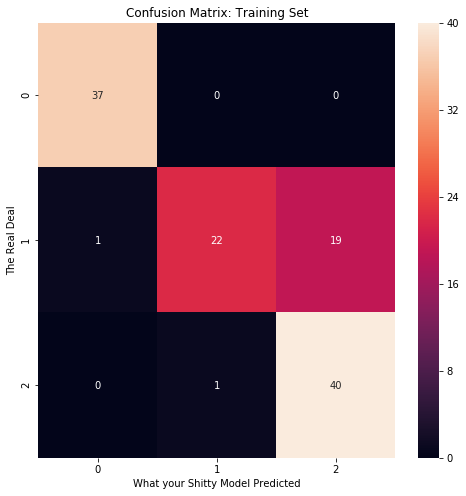

In [36]:
fig, ax = plt.subplots(figsize=(8,8))

ax = sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)
b, t = ax.get_ylim()
ax.set_ylim(b+.5, t-.5)
plt.title('Confusion Matrix: Training Set')
plt.ylabel("The Real Deal")
plt.xlabel("What your Shitty Model Predicted")
plt.show();

#no va tan mal para el training set

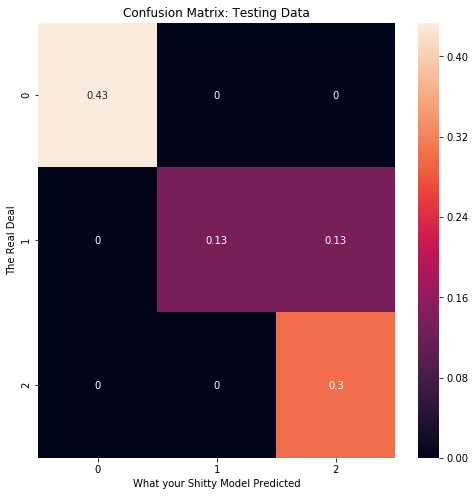

In [39]:
fig, ax = plt.subplots(figsize=(8,8))

ax = sns.heatmap(confusion_matrix(y_test, y_pred_test)/sum(sum(confusion_matrix(y_test, y_pred_test))), annot=True)
b, t = ax.get_ylim()
ax.set_ylim(b+.5, t-.5)
plt.title('Confusion Matrix: Testing Data')
plt.ylabel("The Real Deal")
plt.xlabel("What your Shitty Model Predicted")
plt.show();

#no va tan mal para el training set

In [ ]:
#Ahora lo hice con porcentajes. Vemos que no va tan mal. Solo un 13% equivocado.

## Bonus: Come Pizza con Óscar y la banda en la terraza a las 5:00 p.m. 

In [31]:
#Va